In [12]:
import cv2
import os
from ultralytics import YOLO
from IPython.display import Image, display


In [8]:
ruta_video = '../raw/Medellin2/IMG_7439.mov'  # 🎥 video en formato .mov
output_dir = '../dataset/images/test'
dataset_path = '../dataset'
frame_interval = 60  # Cada 30 frames (aprox. 1 imagen por segundo si es 30fps)

In [3]:
os.makedirs(output_dir, exist_ok=True)

In [6]:
cap = cv2.VideoCapture(ruta_video)
frame_count = 0
saved_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_interval == 0:
        frame_path = os.path.join(output_dir, f"frame_{saved_count:04}.jpg")
        cv2.imwrite(frame_path, frame)
        saved_count += 1

    frame_count += 1

cap.release()
print(f"{saved_count} imágenes guardadas en {output_dir}")

310 imágenes guardadas en ../dataset/images/test


Probando modelo v2 prediccion en medellin

In [18]:
model = YOLO('../results/yolo_train/exp/weights/best.pt')

results = model.predict(source=f"{dataset_path}/images/val/mandalay_1_1_063.jpg", save=True)


image 1/1 d:\GIT\NoHelmetNet\src\..\dataset\images\val\mandalay_1_1_063.jpg: 384x640 1 DHelmetP1Helmet, 1 DHelmet, 69.9ms
Speed: 3.8ms preprocess, 69.9ms inference, 48.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict6


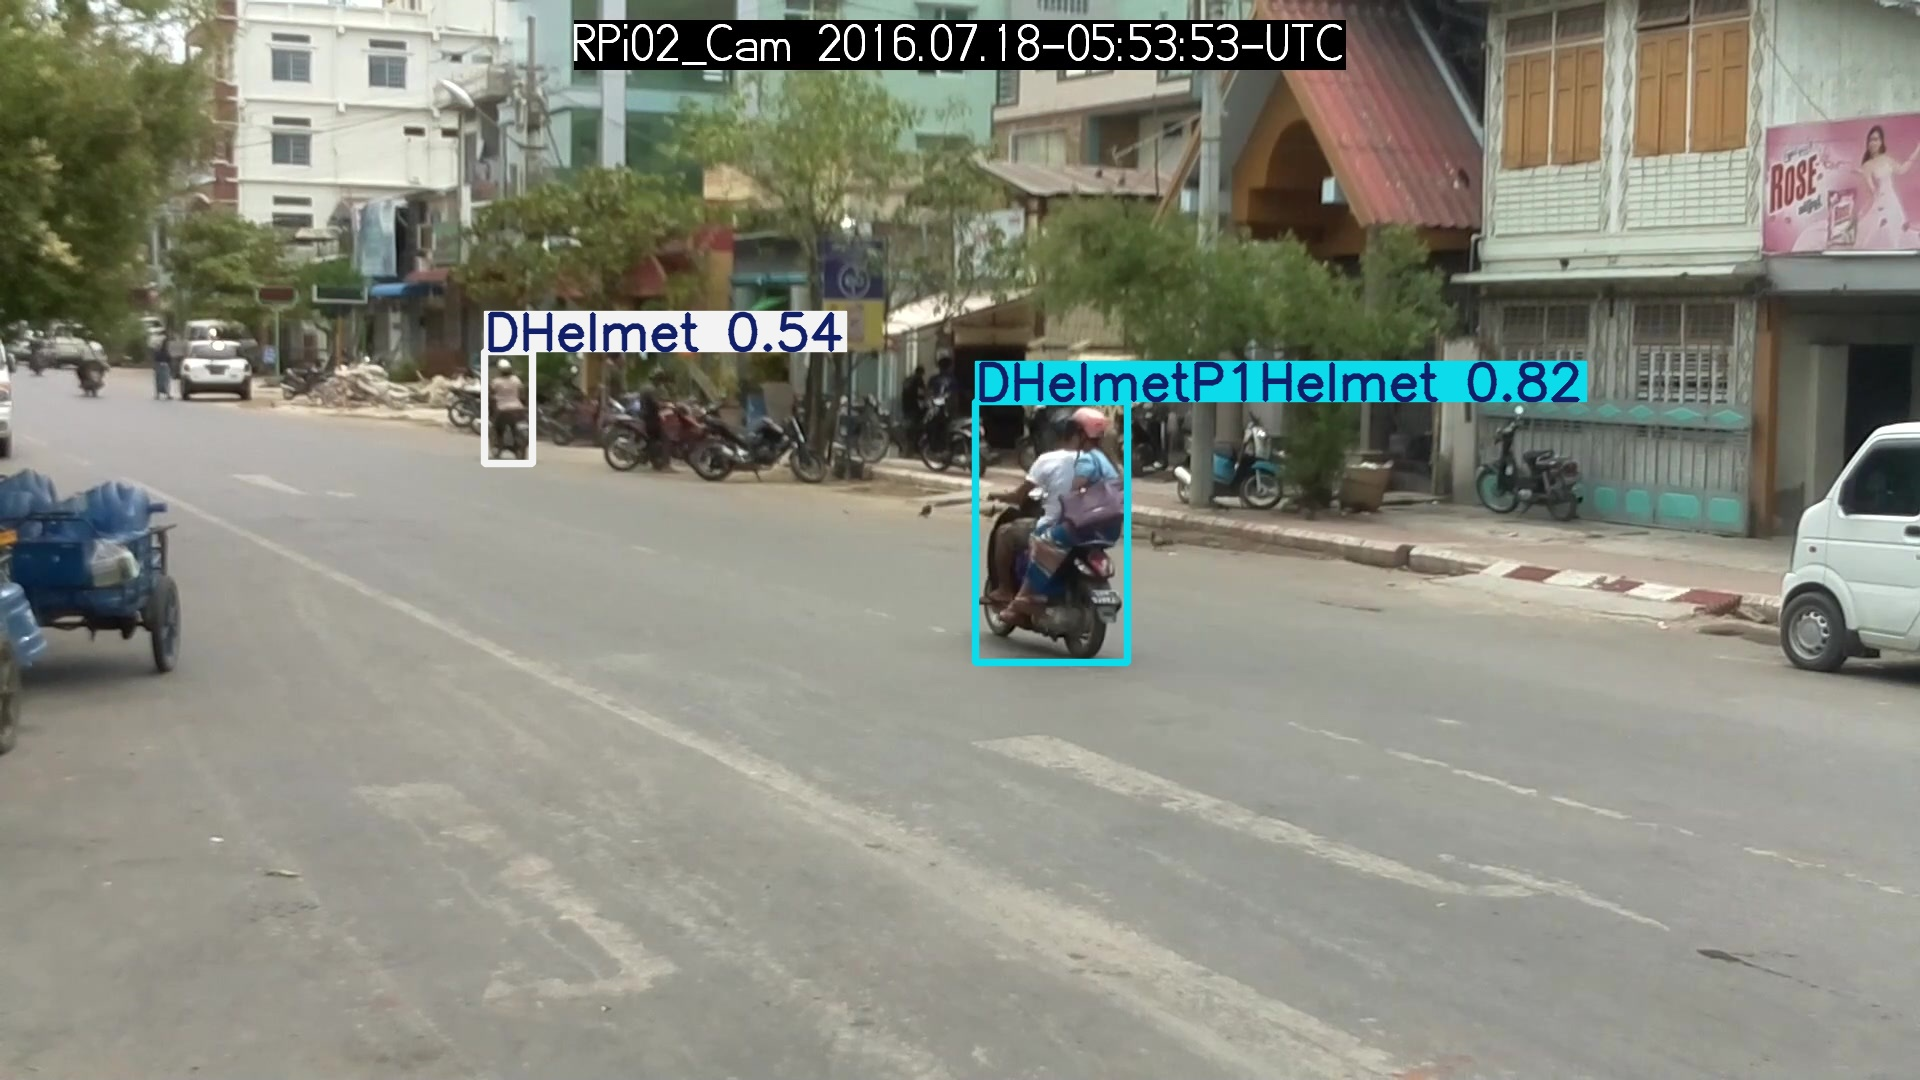

In [19]:
display(Image(filename='runs/detect/predict6/mandalay_1_1_063.jpg'))